<a href="https://colab.research.google.com/github/mannatpannu/Python-/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/glass

Dataset URL: https://www.kaggle.com/datasets/uciml/glass
License(s): DbCL-1.0
  0% 0.00/3.42k [00:00<?, ?B/s]
100% 3.42k/3.42k [00:00<00:00, 11.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/glass.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
df = pd.read_csv('/content/glass.csv')

In [6]:
# Inspect Data
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
#Check for missing value
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


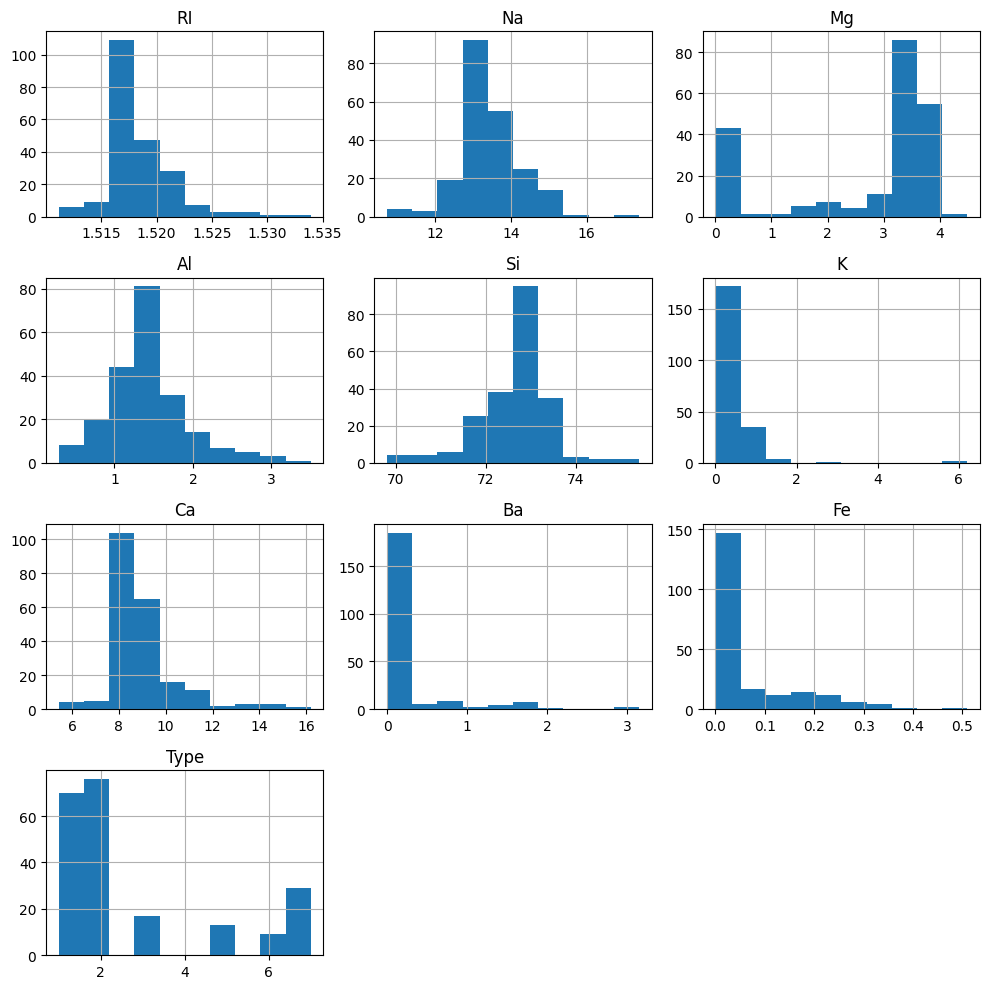

In [12]:
# Visualize Distribution
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

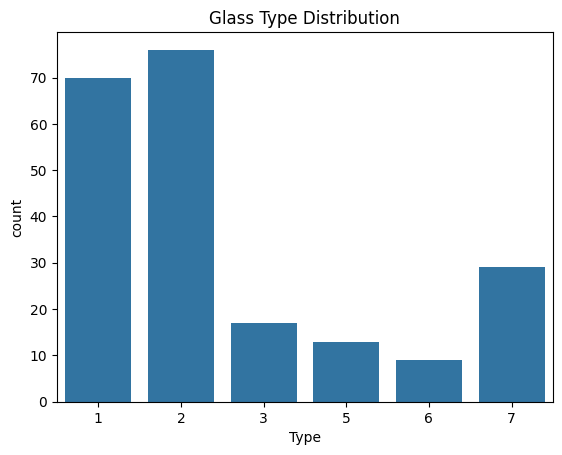

In [13]:
# Class Imbalance
import seaborn as sns
sns.countplot(x='Type', data=df)
plt.title('Glass Type Distribution')
plt.show()

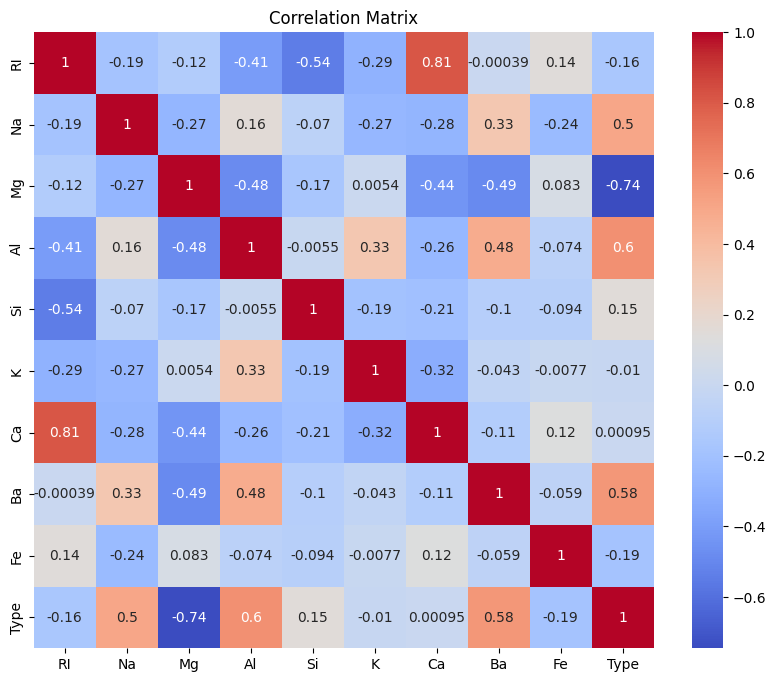

In [14]:
# Corelation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [16]:
# Split features and target
X = df.drop("Type", axis=1)
y = df["Type"]

In [17]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.preprocessing import LabelEncoder
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Encode target variable for XGBoost
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

In [19]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.exceptions import NotFittedError

In [21]:
from lightgbm import LGBMClassifier

In [22]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LGBM': LGBMClassifier()
}

In [23]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:40:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 9
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.802809
[LightGBM] [Info] Start training from score -1.802809
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

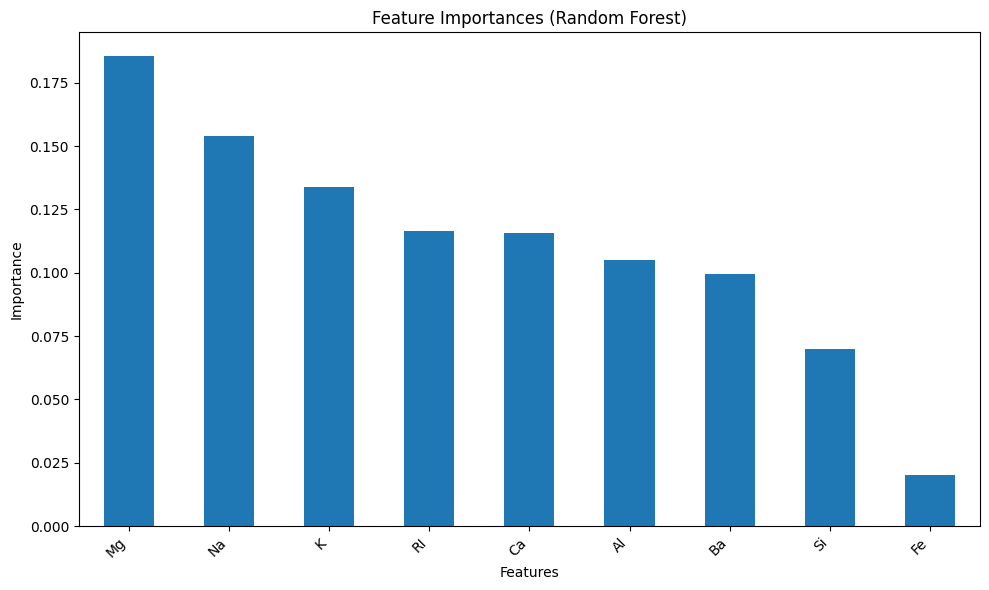

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Random Forest' is the name of your Random Forest model in the 'models' dictionary
rf_model = models['Random Forest']

# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort feature importances and plot
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


📊 Training and Evaluating: Logistic Regression
✅ Accuracy: 0.83
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.83      0.33      0.48        15
           2       0.70      0.93      0.80        15
           3       0.89      1.00      0.94        16
           4       0.94      1.00      0.97        16
           5       0.93      0.93      0.93        15

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.81        92
weighted avg       0.83      0.83      0.81        92



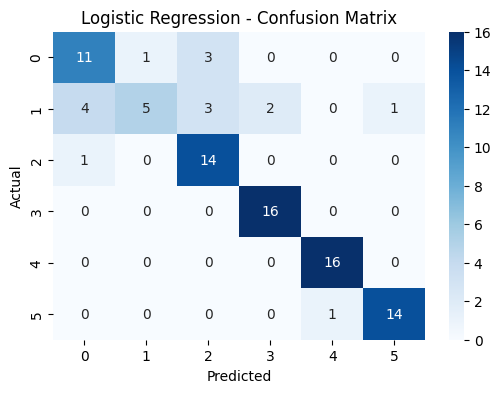


📊 Training and Evaluating: Decision Tree
✅ Accuracy: 0.90
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.81      0.87      0.84        15
           2       0.93      0.93      0.93        15
           3       0.94      0.94      0.94        16
           4       1.00      1.00      1.00        16
           5       0.88      0.93      0.90        15

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



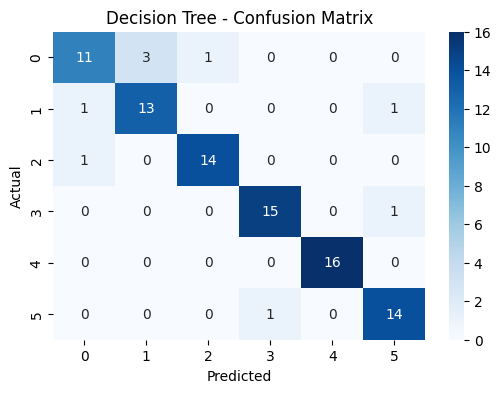


📊 Training and Evaluating: Random Forest
✅ Accuracy: 0.92
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.93      0.87      0.90        15
           2       0.93      0.87      0.90        15
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00        16
           5       0.93      0.93      0.93        15

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



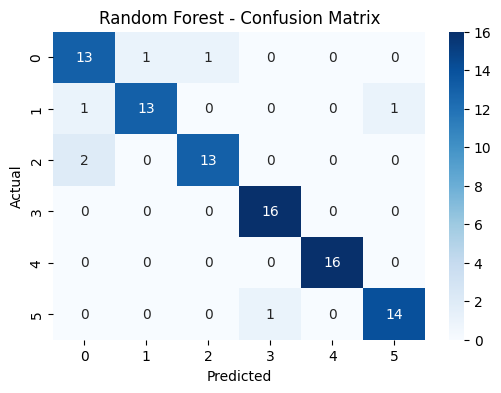


📊 Training and Evaluating: KNN
✅ Accuracy: 0.79
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.64      0.47      0.54        15
           2       0.75      0.80      0.77        15
           3       0.84      1.00      0.91        16
           4       1.00      1.00      1.00        16
           5       1.00      0.80      0.89        15

    accuracy                           0.79        92
   macro avg       0.80      0.79      0.79        92
weighted avg       0.80      0.79      0.79        92



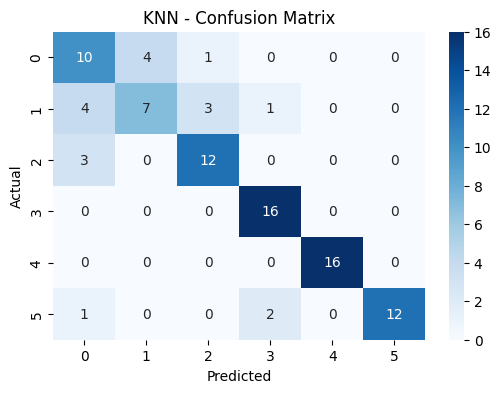


📊 Training and Evaluating: SVM
✅ Accuracy: 0.78
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.52        15
           1       0.62      0.53      0.57        15
           2       0.62      0.67      0.65        15
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00        16
           5       1.00      0.93      0.97        15

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.78      0.78      0.78        92



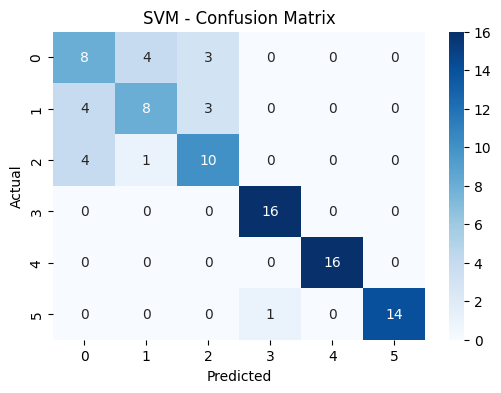


📊 Training and Evaluating: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:41:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.87
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.92      0.73      0.81        15
           2       0.86      0.80      0.83        15
           3       0.94      0.94      0.94        16
           4       0.89      1.00      0.94        16
           5       0.88      0.93      0.90        15

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



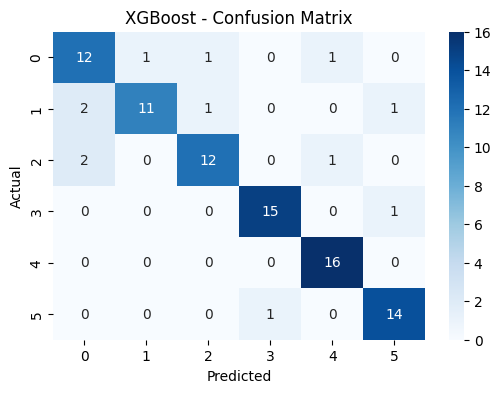


📊 Training and Evaluating: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 9
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Info] Start training from score -1.802809
[LightGBM] [Info] Start training from score -1.802809
[LightGBM] [Info] Start training from score -1.786280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Accuracy: 0.89
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.92      0.80      0.86        15
           2       0.86      0.80      0.83        15
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00        16
           5       0.93      0.93      0.93        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.90      0.89      0.89        92



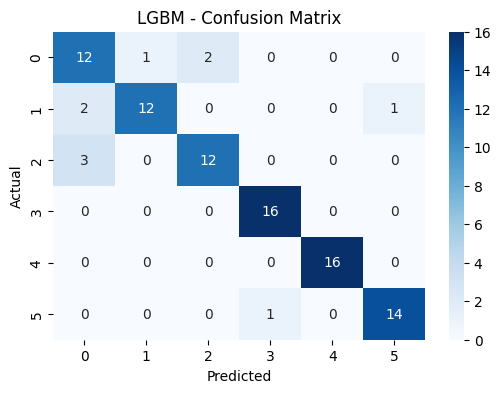

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.exceptions import NotFittedError

results = {} # Initialize an empty dictionary to store results

for name, model in models.items():
    print(f"\n📊 Training and Evaluating: {name}")

    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred) # Get accuracy
        results[name] = {'Accuracy': accuracy} # Store accuracy in results

        print(f"✅ Accuracy: {accuracy:.2f}")
        print("📋 Classification Report:")
        print(classification_report(y_test, y_pred))

        #Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    except NotFittedError as e:
        print(f"Model {name} not fitted properly: {e}")
    except Exception as e:
        print(f"Unexpected error with {name}: {e}")

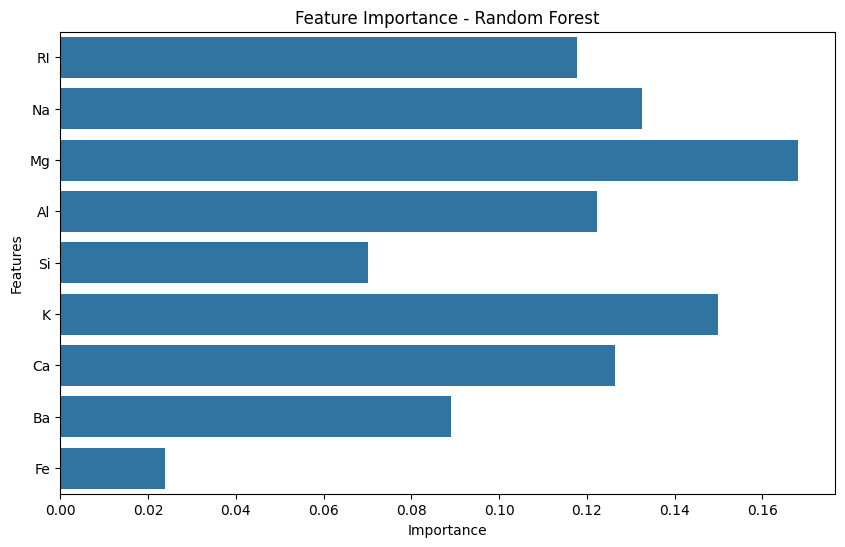

In [26]:
# Random Forest Feature Importance
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


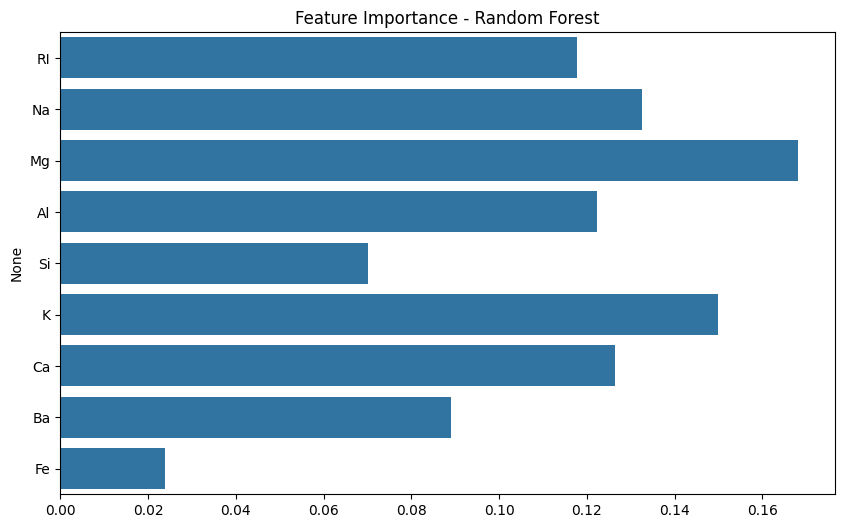

In [27]:
import numpy as np

rf = models["Random Forest"]
importances = rf.feature_importances_
features = df.drop("Type", axis=1).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


In [34]:
import joblib
best_model = models["Random Forest"]
joblib.dump(best_model, "glass_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']